In [6]:
%run adam_model.ipynb
%run dataset_adam_animalface.ipynb

In [7]:
#adam_animalface 데이터셋 객체 생성
aad = Adam_animalfaceDataset()

Model adam_animalface_model_1 train started:
    Epoch 10: cost=2.296, accuracy=0.547+0.218/0.620+0.200 (25/25 secs)
    Epoch 20: cost=2.294, accuracy=0.547+0.218/0.610+0.180 (21/46 secs)
Model adam_animalface_model_1 train ended in 46 secs:
Model adam_animalface_model_1 test report: accuracy = 0.600+0.245, (0 secs)

Model adam_animalface_model_1 Visualization


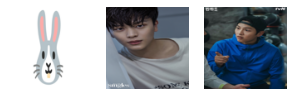

[ 도메인 추정결과 ]
추정확률분포 [46,54] => 추정 person_face : 정답 animal_face => X
추정확률분포 [46,54] => 추정 person_face : 정답 person_face => O
추정확률분포 [46,54] => 추정 person_face : 정답 person_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [19,21,19,21,21] => 추정 dog_face : 정답 rabbit_face => X
추정확률분포 [19,21,19,21,21] => 추정 dog_face : 정답 dinosaur_face => X
추정확률분포 [19,21,19,21,21] => 추정 dog_face : 정답 dog_face => O


In [8]:
#기존 알고리즘 이용
#폭이 10인 은닉계층 하나를 갖는 다층 퍼셉트론 신경망 학습
aam1 = AdamModel('adam_animalface_model_1', aad, [10])
aam1.exec_all(epoch_count=20, report=10)

Model adam_animalface_model_2 train started:
    Epoch 10: cost=1.931, accuracy=0.832+0.286/0.810+0.270 (69/69 secs)
    Epoch 20: cost=1.824, accuracy=0.857+0.338/0.820+0.300 (68/137 secs)
    Epoch 30: cost=1.726, accuracy=0.896+0.345/0.830+0.270 (68/205 secs)
    Epoch 40: cost=1.637, accuracy=0.916+0.397/0.860+0.300 (69/274 secs)
    Epoch 50: cost=1.554, accuracy=0.938+0.417/0.870+0.250 (70/344 secs)
Model adam_animalface_model_2 train ended in 344 secs:
Model adam_animalface_model_2 test report: accuracy = 0.818+0.310, (0 secs)

Model adam_animalface_model_2 Visualization


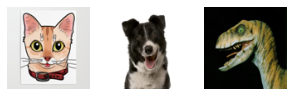

[ 도메인 추정결과 ]
추정확률분포 [100, 0] => 추정 animal_face : 정답 animal_face => O
추정확률분포 [99, 1] => 추정 animal_face : 정답 animal_face => O
추정확률분포 [18,82] => 추정 person_face : 정답 animal_face => X
[ 얼굴상 추정결과 ]
추정확률분포 [ 7,35,12,23,23] => 추정 cat_face : 정답 cat_face => O
추정확률분포 [10, 4,59,26, 1] => 추정 dinosaur_face : 정답 dog_face => X
추정확률분포 [ 6,34,25,23,12] => 추정 cat_face : 정답 dinosaur_face => X


In [9]:
#기존 알고리즘 이용
#은닉계층을 세 단계로 하여 신경망 규모를 키우고 학습률을 디폴트값인 0.001에서 0.0001로 낮추고
#학습 횟수를 50에포크로 늘렸다.
aam2 = AdamModel('adam_animalface_model_2', aad, [64,32,10])
aam2.exec_all(epoch_count=50, report=10, learning_rate=0.0001)

Model adam_animalface_model_3 train started:
    Epoch 10: cost=1.685, accuracy=0.910+0.344/0.880+0.320 (290/290 secs)
    Epoch 20: cost=1.436, accuracy=0.946+0.432/0.850+0.310 (282/572 secs)
    Epoch 30: cost=1.276, accuracy=0.959+0.490/0.840+0.330 (280/852 secs)
    Epoch 40: cost=0.998, accuracy=0.984+0.614/0.860+0.330 (356/1208 secs)
    Epoch 50: cost=0.789, accuracy=0.986+0.701/0.900+0.360 (694/1902 secs)
Model adam_animalface_model_3 train ended in 1902 secs:
Model adam_animalface_model_3 test report: accuracy = 0.842+0.376, (0 secs)

Model adam_animalface_model_3 Visualization


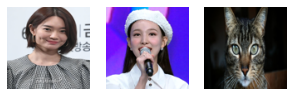

[ 도메인 추정결과 ]
추정확률분포 [26,74] => 추정 person_face : 정답 person_face => O
추정확률분포 [44,56] => 추정 person_face : 정답 person_face => O
추정확률분포 [100, 0] => 추정 animal_face : 정답 animal_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [ 1, 6,24,50,20] => 추정 dog_face : 정답 dinosaur_face => X
추정확률분포 [ 0,44, 0,11,45] => 추정 rabbit_face : 정답 rabbit_face => O
추정확률분포 [ 0,100, 0, 0, 0] => 추정 cat_face : 정답 cat_face => O


In [10]:
#앞에서와 같은 구성을 갖도록 하면서 아담 알고리즘을 사용할 경우
#원래 복합출력말고 기본출력으로 했을때 연예인으로는 30프로대 동물로만 했을때 57프로 나왔는데
#복합출력이면서 아담알고리즘을 사용하니 84퍼센트로 크게 상승했다.
aam3 = AdamModel('adam_animalface_model_3', aad, [64,32,10])
aam3.use_adam = True
aam3.exec_all(epoch_count=50, report=10, learning_rate=0.0001)